# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [16]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = '/Users/davide/Desktop/Università/Magistrale - PoliMi/Anno 1 - 2023:2024/Semestre 1/Numerical Analysis/Laboratory/Lab 1/TarantulaNebula.jpg'

A = imread(image_path)
print(type(A))
A.shape

<class 'numpy.ndarray'>


(567, 630, 3)

Visualize the picture

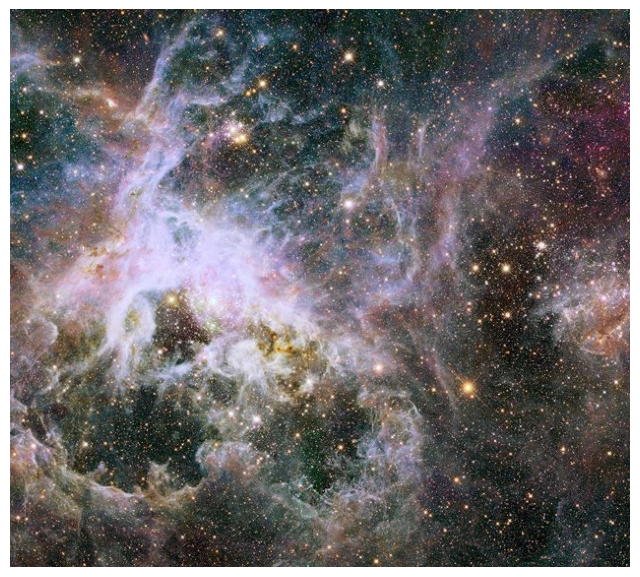

In [ ]:
img = plt.imshow(A)
#plt.axis('off')
plt.show()

Convert the picture to gray-scale and visualize it.

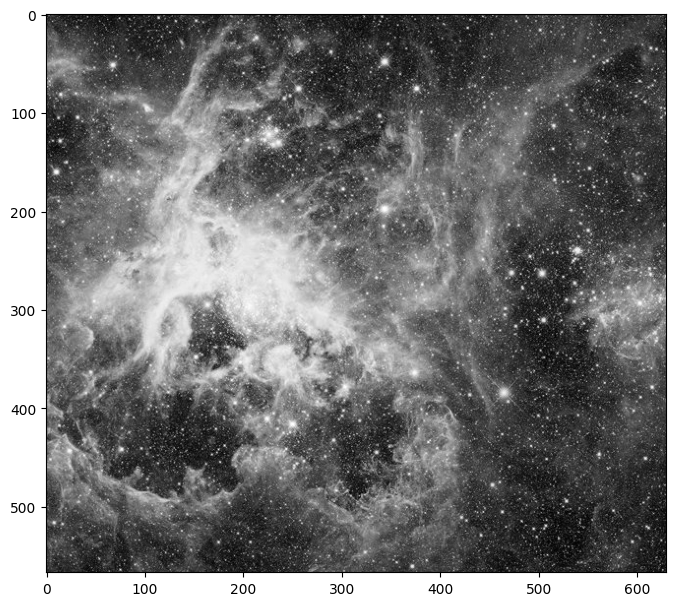

In [59]:
gray_a = list()
for row in A:
  gray_a.append(list())
  for col in row:
    gray_a[-1].append(sum(col) / 3)
  gray_a[-1] = np.array(gray_a[-1])

gray_a = np.array(gray_a)

# gray_a = np.mean(A, axis=2) --> stessa cosa, ma più veloce e pythonic. axis=2 significa media sulle colonne

plt.gray()
plt.imshow(gray_a)

What is the picture size?

In [19]:
gray_a.shape

(567, 630)

Perform the SVD decomposition

In [21]:
u, s, vt = np.linalg.svd(gray_a)
print(u.shape, s.shape, vt.shape)

(567, 567) (567,) (630, 630)


Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

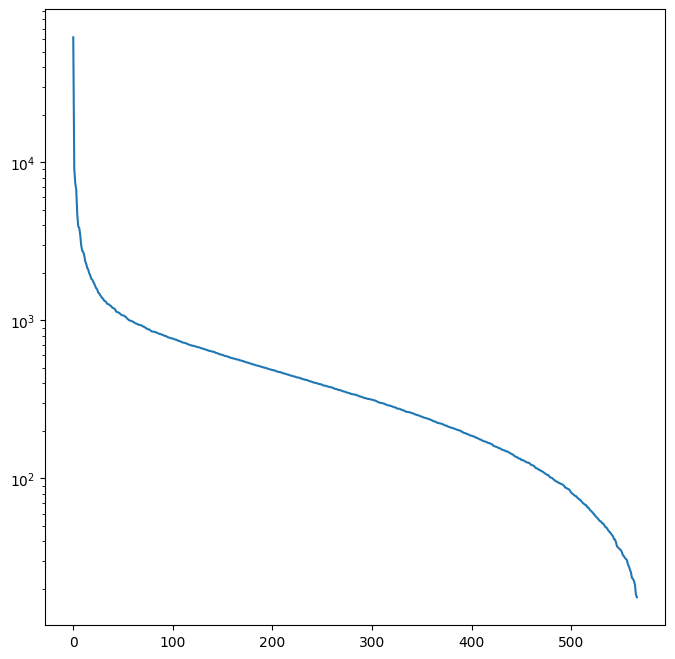

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False)
axes[0][0].set_yscale("log") # di solito questi si plottano in scala logaritmica
axes[0][0].plot([x for x in range(s.shape[0])], [s[i] for i in range(s.shape[0])])
# anche qui ci sono funzioni di numpy apposta per fare ciò --> ad esempio np.cumsum()

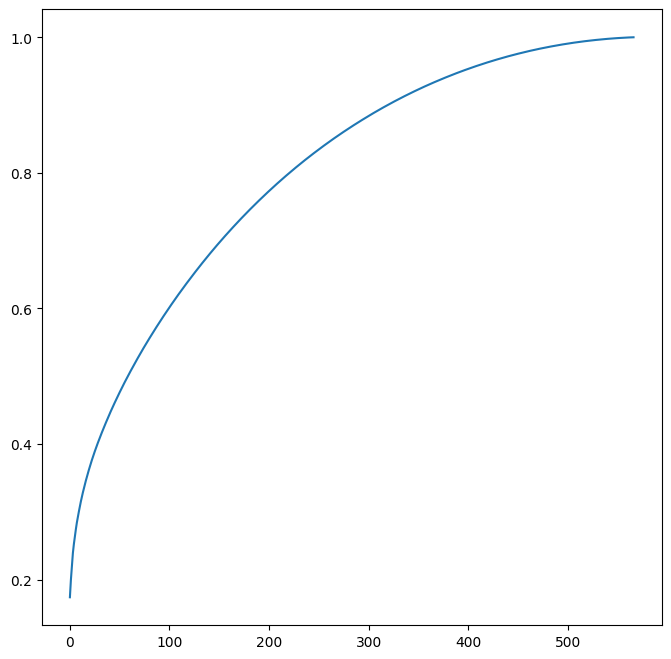

In [61]:
plt.plot([x for x in range(s.shape[0])], [sum(s[0:i + 1]) / sum(s) for i in range(s.shape[0])])

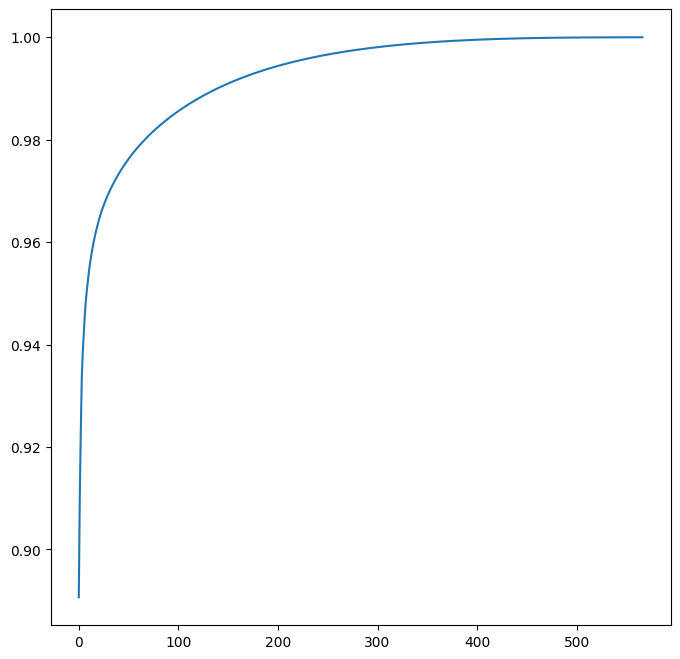

In [25]:
import math

def sum_squared(arr):
  tot = 0
  for num in arr:
    tot += math.pow(num, 2)
  return tot

plt.plot([x for x in range(s.shape[0])], [sum_squared(s[0:i + 1]) / sum_squared(s) for i in range(s.shape[0])])

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

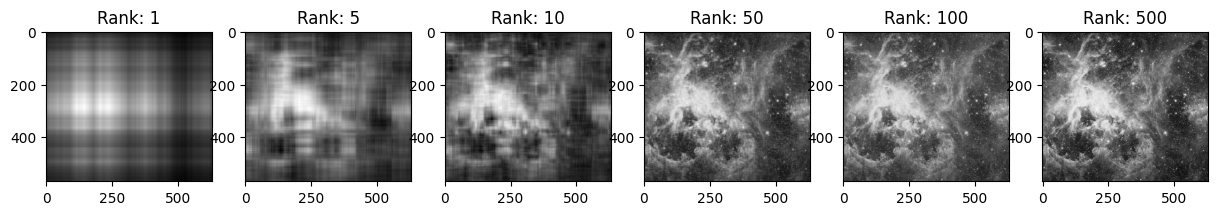

In [56]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 15), squeeze=False)

for i, rank in enumerate([1, 5, 10, 50, 100, 500]):
  s_temp = np.zeros(gray_a.shape)
  for j in range(0, rank):
    s_temp[j][j] = s[j]
  mat = u @ s_temp @ vt
  axes[0][i].imshow(mat)
  axes[0][i].set_title("Rank: " + str(rank))

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

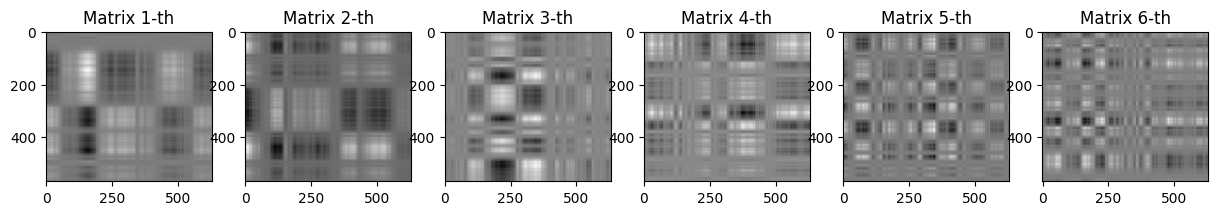

In [58]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(15, 15), squeeze=False)

for i in range(1, 7):
  s_temp = np.zeros(gray_a.shape)
  s_temp[i][i] = s[i]
  mat = u @ s_temp @ vt # era sufficiente fare np.outer() tra i vettori che servono in U e VT --> prodotto v * vt = mat
  axes[0][i - 1].imshow(mat)
  axes[0][i - 1].set_title(f"Matrix {i}-th")

## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.

In [71]:
def randomized_SVD(A, k):
  m = A.shape[0]
  n = A.shape[1]
  p = 0 # potrei alzarlo un po', un valore tipico è 10 --> ti dà un range si sicurezza maggiore

  G = np.random.rand(n, k + p)
  Y = A @ G
  Q, _ = np.linalg.qr(Y) # Q non è altro che Y orto-normalizzata --> trucco per orto-normalizzare una matrice in numpy

  B = np.transpose(Q) @ A # B è (k + p) X n
  u, s, vt = np.linalg.svd(B) # molto veloce, perché B è dimensionalmente bassa, rispetto ad A
  u = Q @ u

  return u, s, vt

Set $k=100$ and compute the randomized SVD of the picture used above.

In [72]:
u, s, vt = randomized_SVD(gray_a, 100)
# come vedrai i singolar values cambiano leggermente --> più aumenta k più aumenta l'errore --> lo stimi come MSE, ad esempio
# i seguenti grafici potresti plottarli a coppie con i precedenti reali, per capire meglio l'andamento

Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.

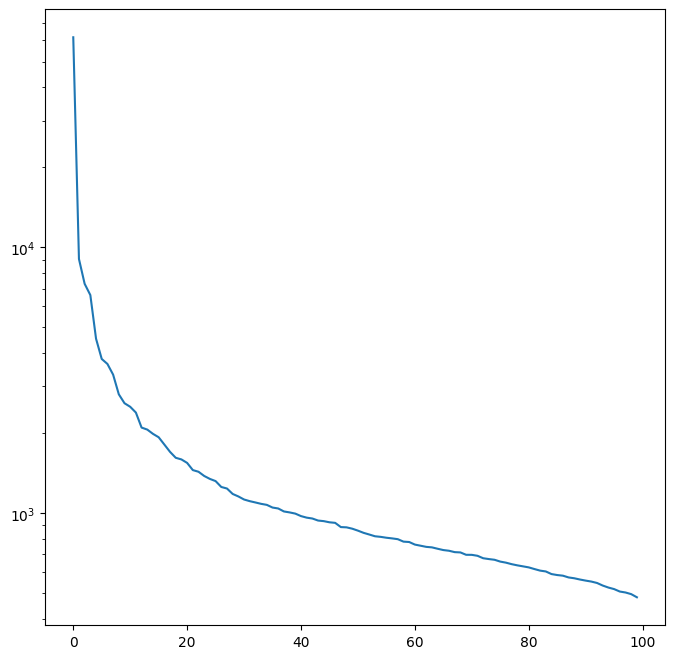

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False)
axes[0][0].set_yscale("log") # di solito questi si plottano in scala logaritmica
axes[0][0].plot([x for x in range(s.shape[0])], [s[i] for i in range(s.shape[0])])

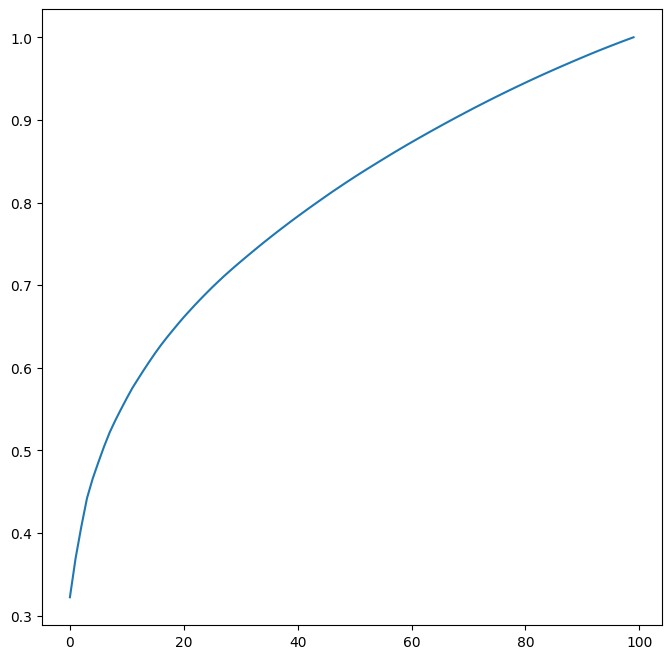

In [74]:
plt.plot([x for x in range(s.shape[0])], [sum(s[0:i + 1]) / sum(s) for i in range(s.shape[0])])

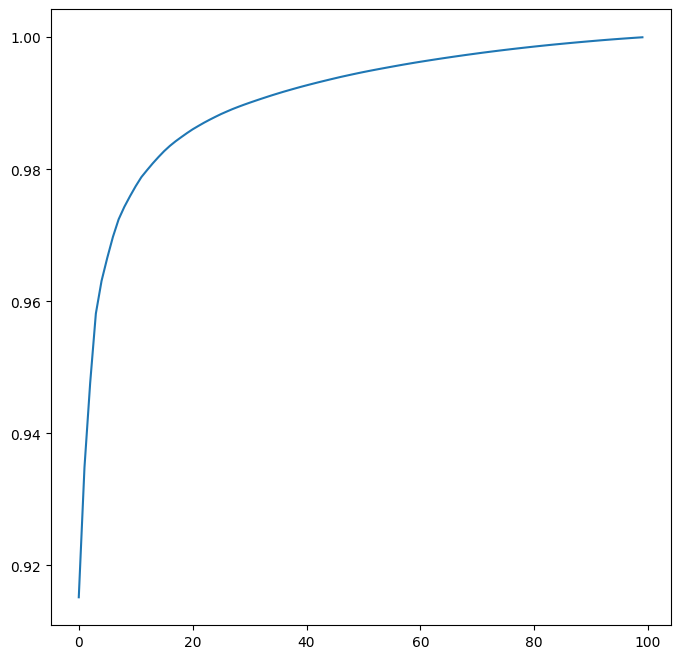

In [75]:
plt.plot([x for x in range(s.shape[0])], [sum_squared(s[0:i + 1]) / sum_squared(s) for i in range(s.shape[0])])

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.

(567, 100) (630, 630)


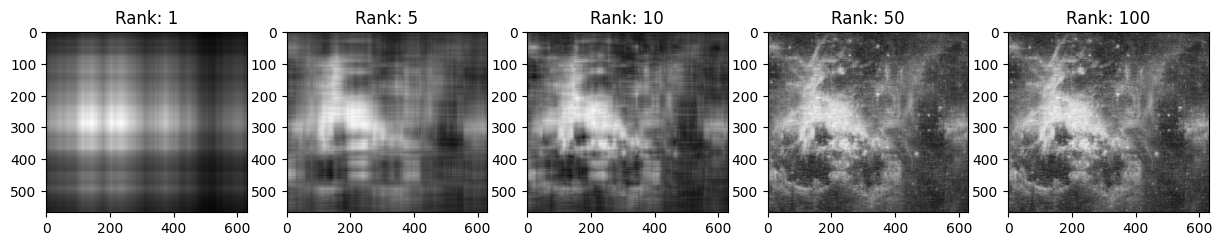

In [80]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15), squeeze=False)
print(u.shape, vt.shape) # s.shape è (100, 567) --> considerando la matrice sigma completa

for i, rank in enumerate([1, 5, 10, 50, 100]):
  s_temp = np.zeros((100, gray_a.shape[1])) # qui devi fare in modo che la matrice sigma si accoppi bene con la matrice u
  for j in range(0, rank):
    s_temp[j][j] = s[j]
  mat = u @ s_temp @ vt
  axes[0][i].imshow(mat)
  axes[0][i].set_title("Rank: " + str(rank))

In [ ]:
# come vedi questa approssimazione è ottima --> dal rank 50 in poi non c'è nessuna differenza rilevante --> ottimo metodo numerico (randomized linear algebra)